In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import torch.nn.functional as F



In [2]:
#ANN that can add two integers between -10 and +10

# dataset creation
xValues= []
yValues = []
for i in range(-10,11):
    for j in range(-10,11):
        xValues.append([i, j])
        yValues.append(i+j)

print(yValues)
X = np.array(xValues, dtype=np.float32)
Y = np.array(yValues, dtype=np.float32).reshape(-1, 1)

#normalizing the data
X = X / 10.0
Y = Y / 20.0
#verifying the shape
X.shape, Y.shape

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 

((441, 2), (441, 1))

In [3]:
# verfication that my dataset is being created correctly
# print(X)  
# print(Y)

# split the data into training and testing using sklearn

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, shuffle=True,random_state=42)
# as long as the shuffle is happening correctly it wont ruin the labels to verify that:
# print(xTrain[0])
# print(yTrain[0])
# print(xTest[0])
# print(xTest[0])

# now i need to convert the data into pytorch tensors
xTrain = torch.from_numpy(xTrain).float()
yTrain = torch.from_numpy(yTrain).float()

xTest = torch.from_numpy(xTest).float()
yTest = torch.from_numpy(yTest).float()

## now i need to create the dataset
trainDataSet  = torch.utils.data.TensorDataset(xTrain, yTrain)
testDataAet = torch.utils.data.TensorDataset(xTest, yTest) 
# # now i can create the dataloaders

batchSize=16 # trying batchsize 16
trainDataLoader = DataLoader(trainDataSet, batch_size=16, shuffle=True)
testDataLoader = DataLoader(testDataAet, batch_size=16, shuffle=True)



In [4]:
# now i need to create the model
class ANNcalculator(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(2, 64)
        self.hidden1 = nn.Linear(64, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden1(x)) 
        x= F.relu(self.hidden2(x))
        return self.output(x)




In [5]:
numepochs = 500

def trainTheModel():
    lossFun = nn.MSELoss()
    optimizer = torch.optim.Adam(calculator.parameters(), lr=0.01)

    trainAcc = []
    testAcc = []
    losses = np.zeros(numepochs)

    for epochi in range(numepochs):
        calculator.train()

        batchLoss = []
        batchAcc = []
        print("Training...")
        for x, Y in trainDataLoader:
            yHat = calculator(x)
            loss = lossFun(yHat, Y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())

            correct = torch.abs(yHat - Y) < 0.5  
            acc = 100 * torch.mean(correct.float()).item()
            batchAcc.append(acc)

        trainAcc.append(np.mean(batchAcc))
        losses[epochi] = np.mean(batchLoss)

        calculator.eval()
        X, y = next(iter(testDataLoader))
        with torch.no_grad():
            yHat = calculator(X)
            correct = torch.abs(yHat - y) < 0.5
            acc = 100 * torch.mean(correct.float()).item()
            testAcc.append(acc)

    return trainAcc, testAcc, losses


In [6]:
calculator = ANNcalculator()
trainAccNo,testAccNo,lossesNo = trainTheModel()



Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Trai

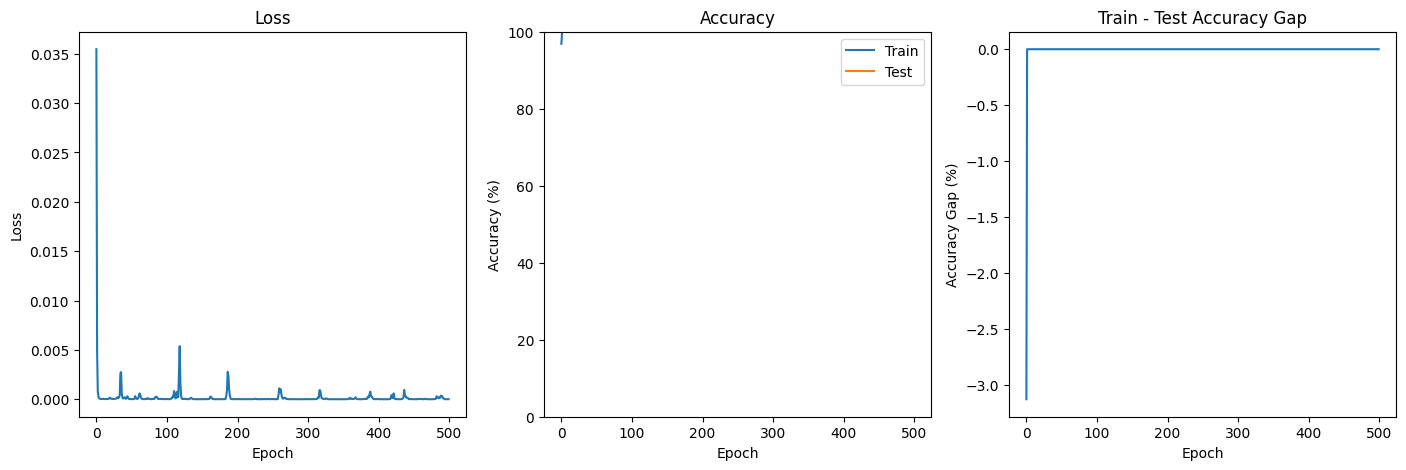

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

# Loss Plot
ax[0].plot(lossesNo)
ax[0].set_title("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")


# Accuracy Plot
ax[1].plot(trainAccNo, label="Train")
ax[1].plot(testAccNo, label="Test")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_ylim(0, 100)
ax[1].legend()

# Optional: Difference in accuracy over epochs
ax[2].plot(np.array(trainAccNo) - np.array(testAccNo))
ax[2].set_title("Train - Test Accuracy Gap")
ax[2].set_xlabel("Epoch")
ax[2].set_ylabel("Accuracy Gap (%)")

plt.show()